
# About Dataset
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

Customer ID: A unique identifier for each customer
Surname: The customer's surname or last name
Credit Score: A numerical value representing the customer's credit score
Geography: The country where the customer resides (France, Spain or Germany)
Gender: The customer's gender (Male or Female)
Age: The customer's age.
Tenure: The number of years the customer has been with the bank
Balance: The customer's account balance
NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
EstimatedSalary: The estimated salary of the customer
Exited: Whether the customer has churned (1 = yes, 0 = no)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv("/content/drive/MyDrive/task/bank_customer_churn/Churn_Modelling.csv")

In [3]:
file.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


# Note
•	Drop irrelevant features
1. RowNumber
2. CustomerId
3. Surname

In [5]:
file = file.drop(["RowNumber","CustomerId","Surname"], axis =1, errors = "ignore")

In [6]:
file.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0


### missing values

In [7]:
file.isnull().sum()

,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,1
IsActiveMember,1
EstimatedSalary,0


In [8]:
file.dropna(inplace=True)
file.shape

(9998, 11)

### Checking and drop the duplicates

In [9]:
file.duplicated().sum()

np.int64(2)

In [10]:
file[file.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [11]:
file.drop_duplicates(inplace=True)
file.shape

(9996, 11)

In [12]:
file["Exited"].value_counts()*100/(len(file))

,count
Exited,
0,79.621849
1,20.378151


# EDA

In [13]:
file.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Exited
0    0.796218
1    0.203782
Name: proportion, dtype: float64


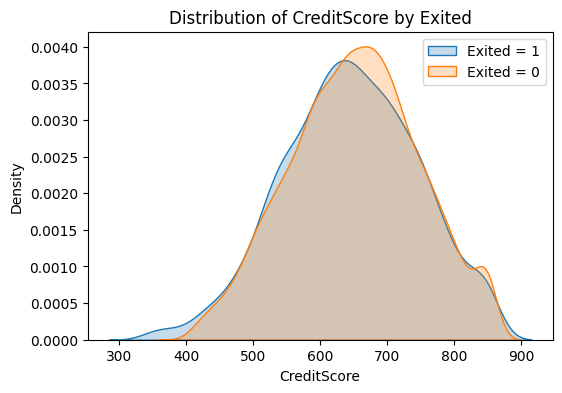

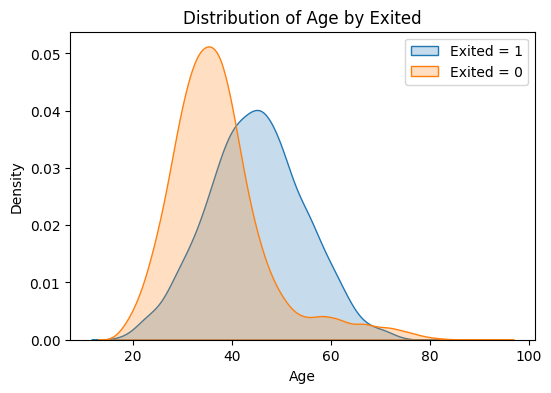

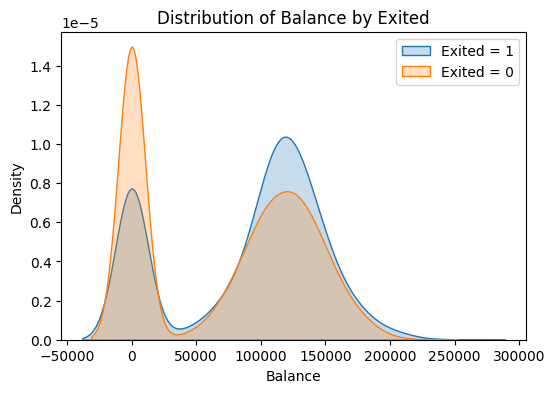

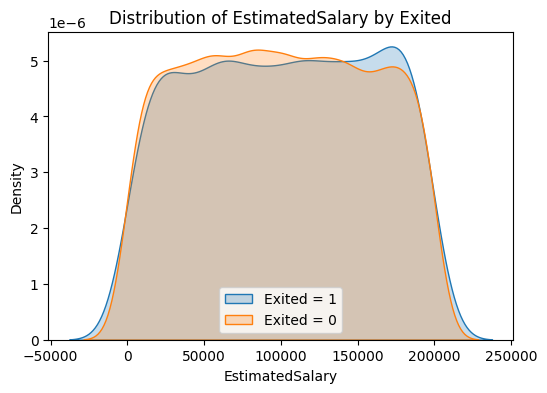

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = file
print(df['Exited'].value_counts(normalize=True))

churned = df[df['Exited'] == 1]
not_churned = df[df['Exited'] == 0]


features_to_plot = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for col in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.kdeplot(churned[col], label='Exited = 1', fill=True)
    sns.kdeplot(not_churned[col], label='Exited = 0', fill=True)
    plt.title(f'Distribution of {col} by Exited')
    plt.legend()
    plt.show()



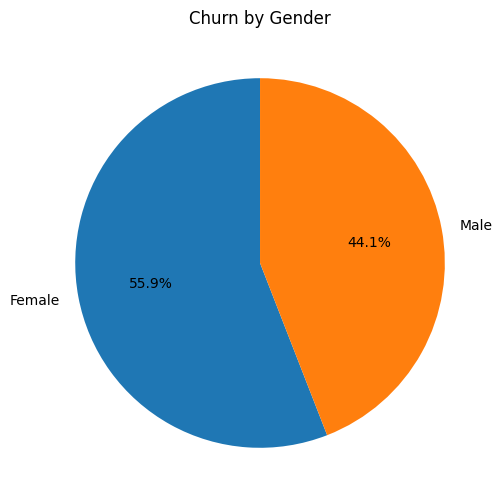

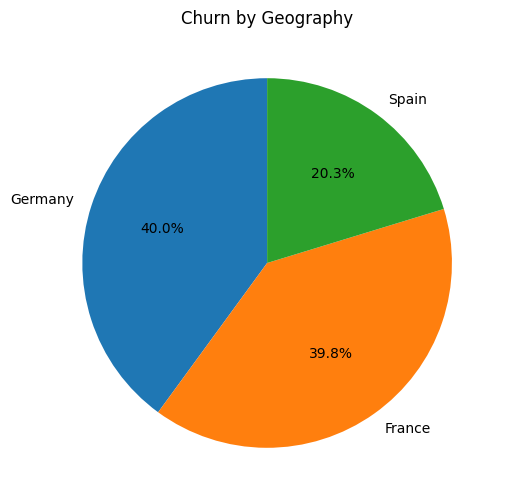

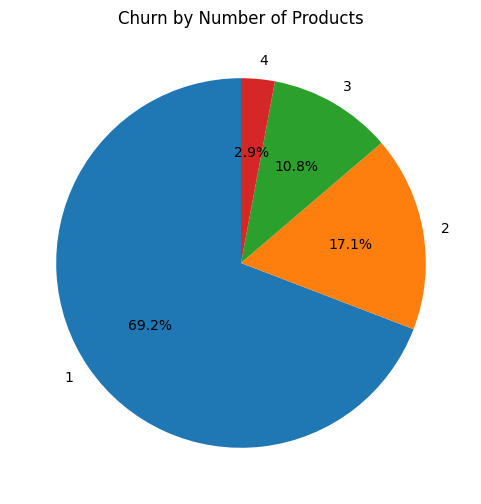

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


exited_df = df[df['Exited'] == 1]

# Pie chart for Gender
gender_counts = exited_df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn by Gender')
plt.show()

# Pie chart for Geography
geo_counts = exited_df['Geography'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(geo_counts, labels=geo_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn by Geography')
plt.show()

# Pie chart for NumOfProducts
product_counts = exited_df['NumOfProducts'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn by Number of Products')
plt.show()


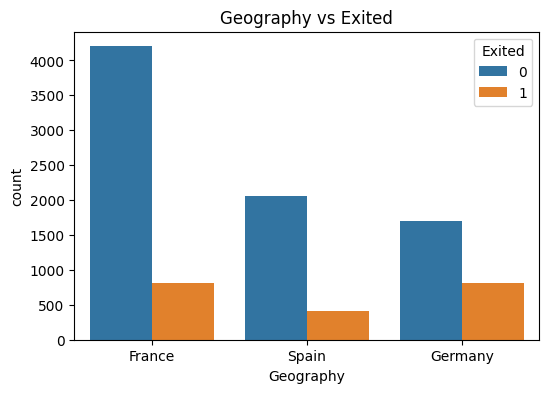

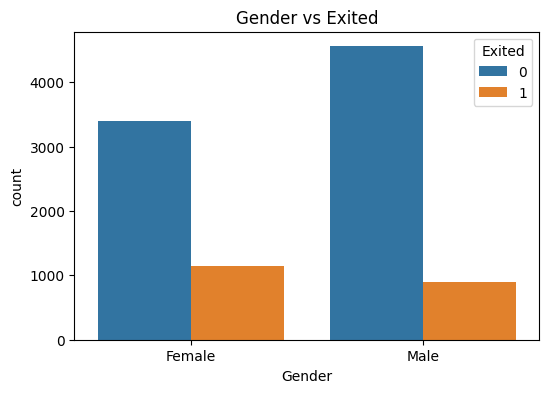

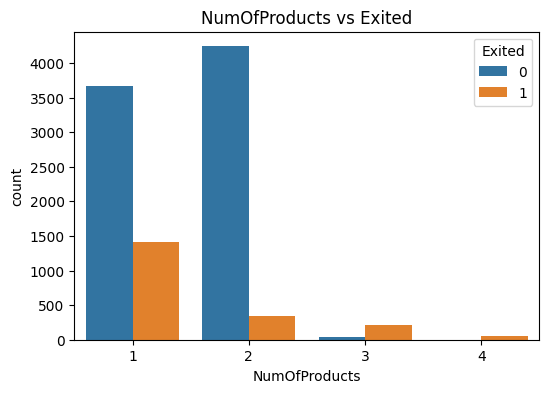

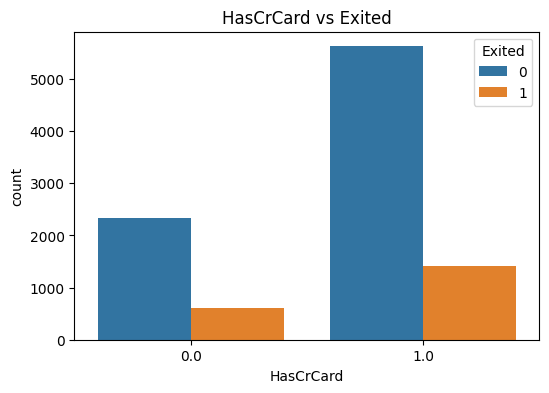

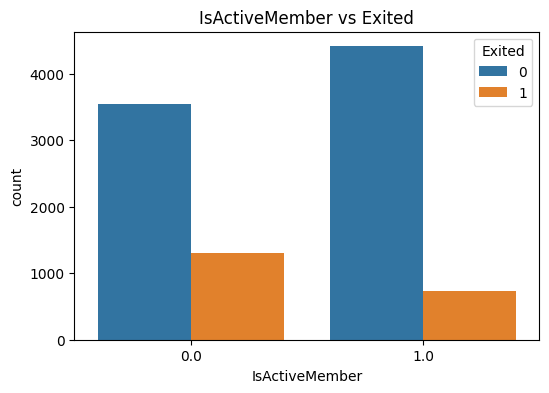

In [16]:
# df = df[df["Geography"]=="France"]
categorical = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'{col} vs Exited')
    plt.show()

In [17]:
file.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

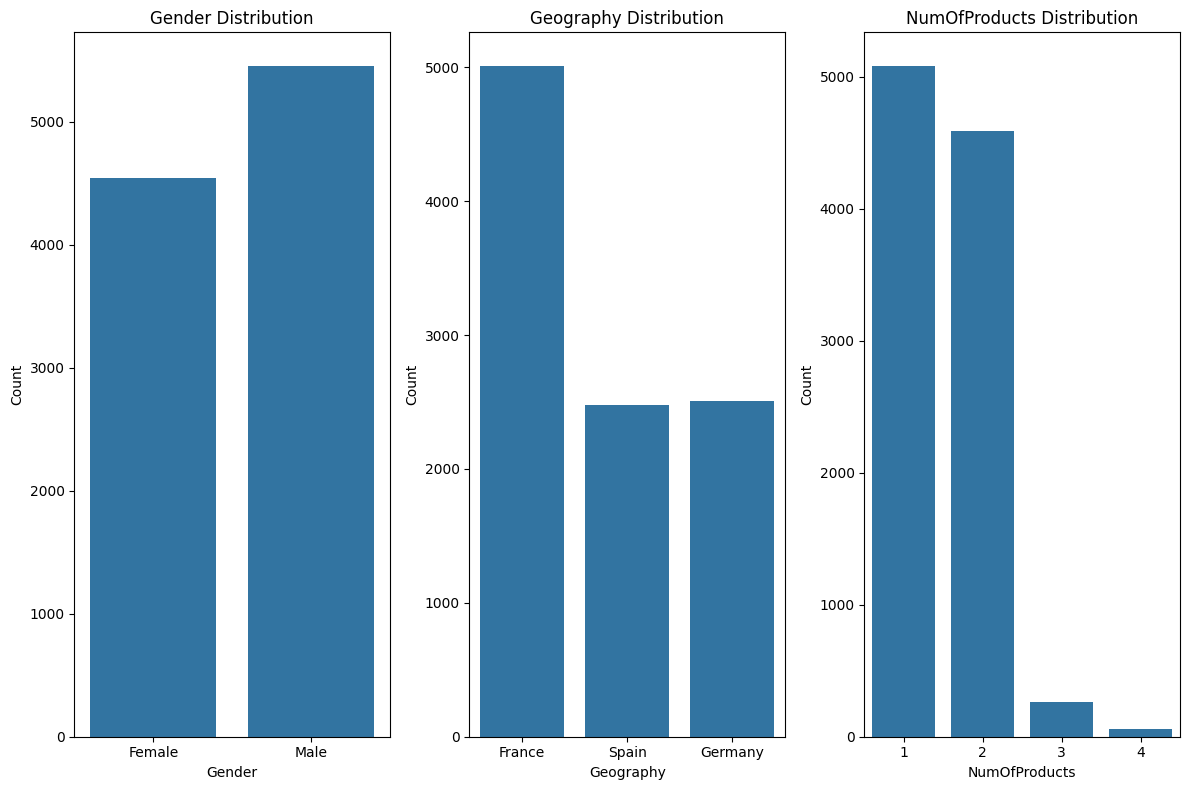

In [18]:

categorical_columns = ['Gender', 'Geography', 'NumOfProducts']

plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



### Correlation

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Fit and transform the Geography column
df['Geography_encoded'] = label_encoder.fit_transform(df['Geography'])
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])


# Display encoded values
print(df[['Geography', 'Geography_encoded']].drop_duplicates())
print(df[['Gender', 'Gender_encoded']].drop_duplicates())



  Geography  Geography_encoded
0    France                  0
1     Spain                  2
7   Germany                  1
   Gender  Gender_encoded
0  Female               0
5    Male               1


<Axes: >

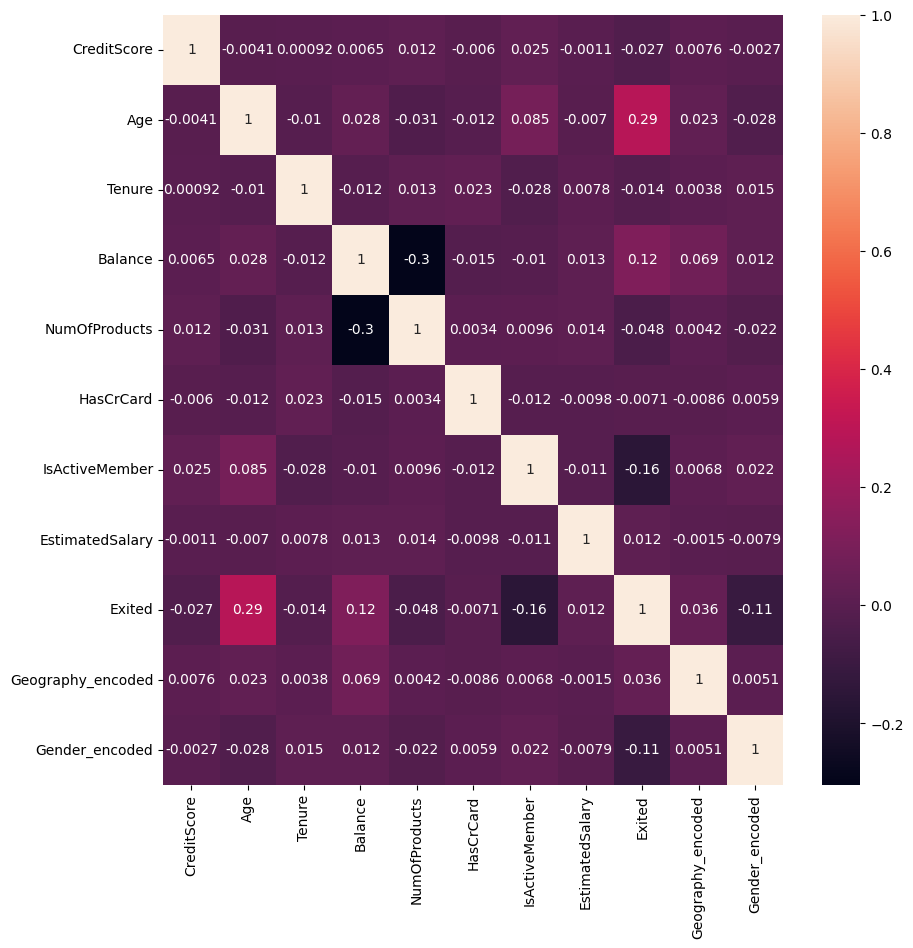

In [20]:
corr = df[['CreditScore',  'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_encoded', 'Gender_encoded']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot =True)


In [21]:
file.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,650.503301,38.921071,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782,0.746399,0.545618
std,96.624668,10.488421,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829,0.827499,0.497940
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000,0.000000,1.000000
75%,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,2.000000,1.000000


In [22]:
df1 = df[['CreditScore',  'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_encoded', 'Gender_encoded']]

In [23]:
df1.skew().sort_values(ascending=False)

,0
Exited,1.470987
Age,1.011775
NumOfProducts,0.745734
Geography_encoded,0.500686
Tenure,0.010668
EstimatedSalary,0.001636
IsActiveMember,-0.059659
CreditScore,-0.071980
Balance,-0.140765
Gender_encoded,-0.183265


In [24]:
# Apply log transformation (add small constant to avoid log(0))
df1['Age_log'] = np.log1p(df1['Age'])
df1['NumOfProducts_log'] = np.log1p(df1['NumOfProducts'])
df1.skew().sort_values(ascending=False)

,0
Exited,1.470987
Age,1.011775
NumOfProducts,0.745734
Geography_encoded,0.500686
NumOfProducts_log,0.351268
Age_log,0.203725
Tenure,0.010668
EstimatedSalary,0.001636
IsActiveMember,-0.059659
CreditScore,-0.071980


In [25]:
df1 = df1[['CreditScore',  'Age_log', 'Tenure', 'Balance',
       'NumOfProducts_log', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_encoded', 'Gender_encoded']]

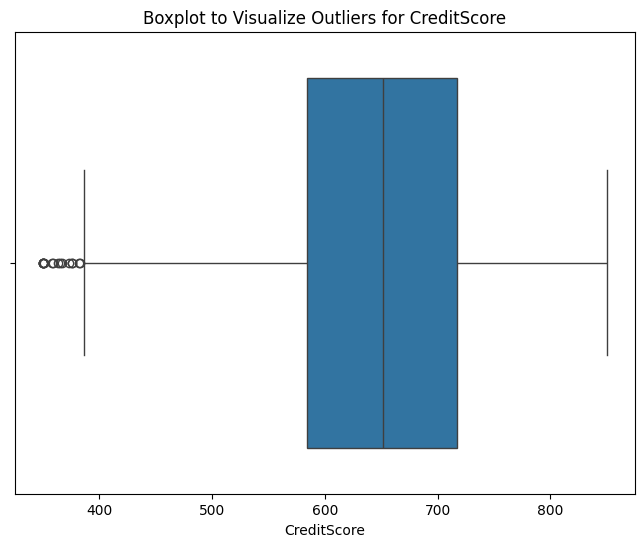

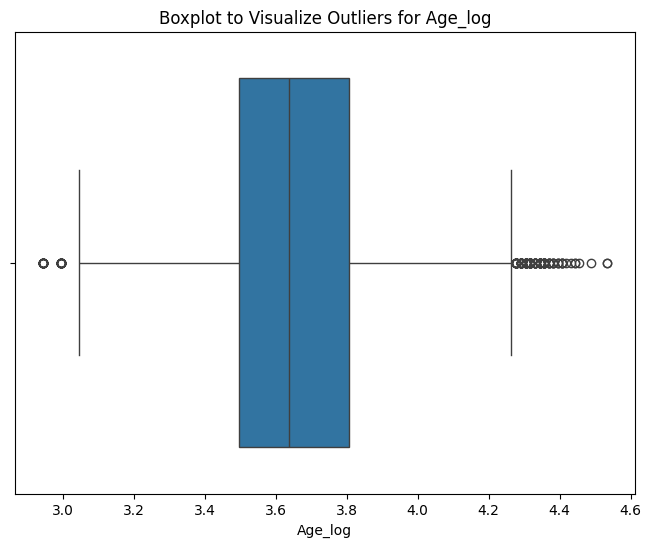

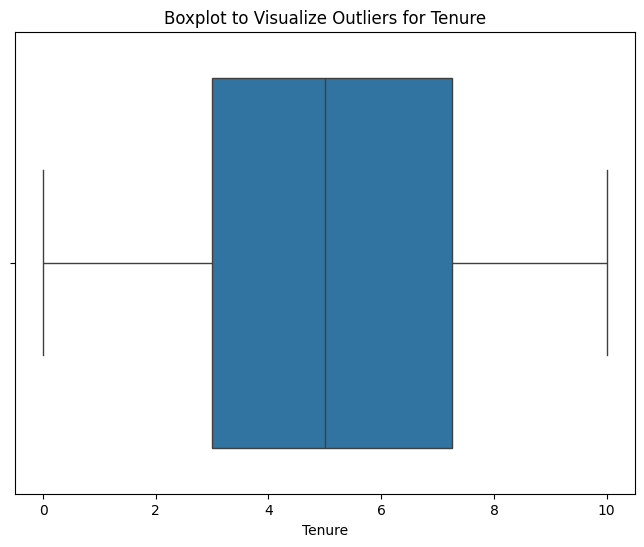

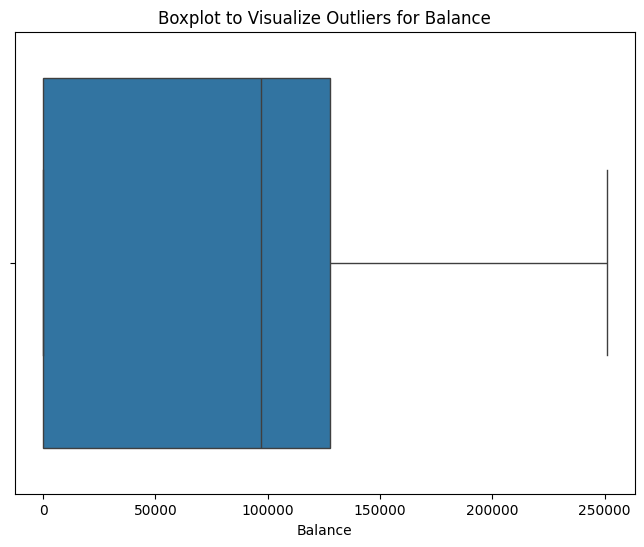

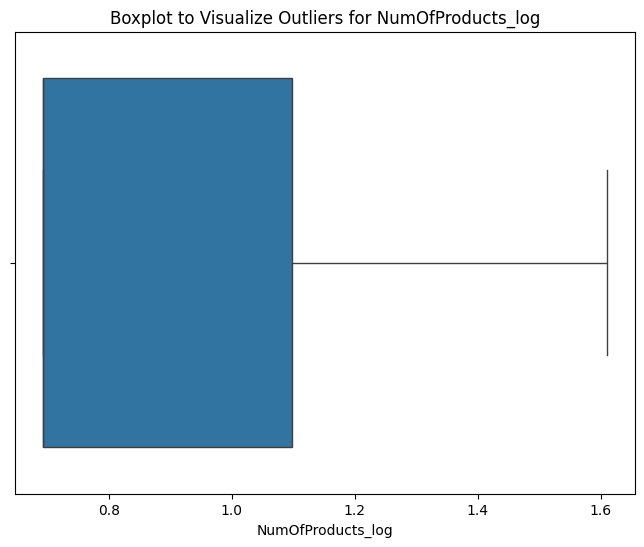

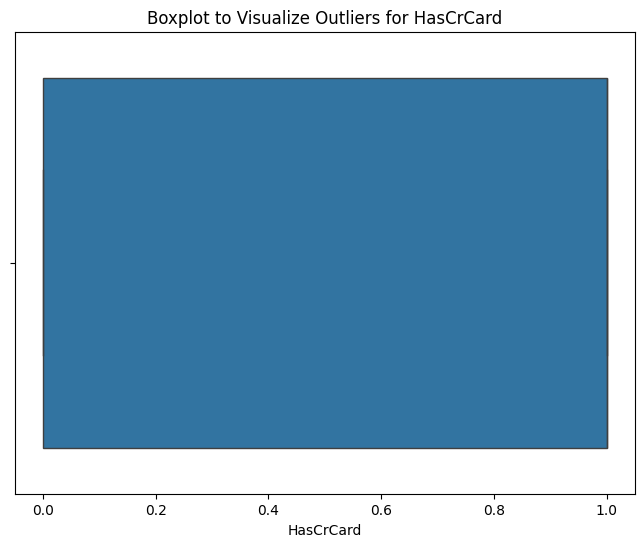

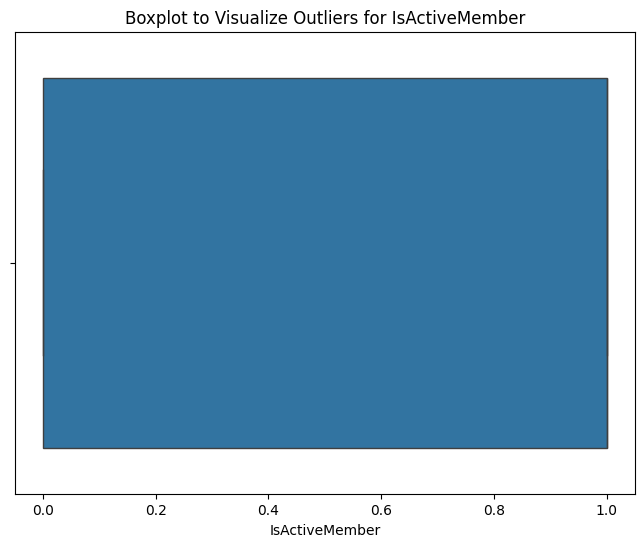

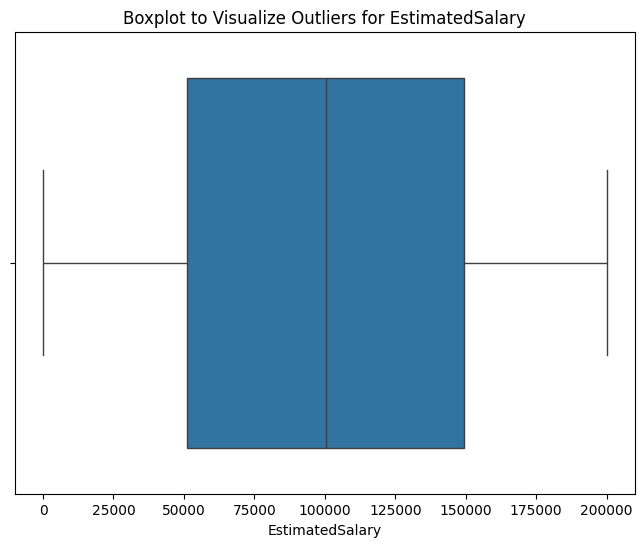

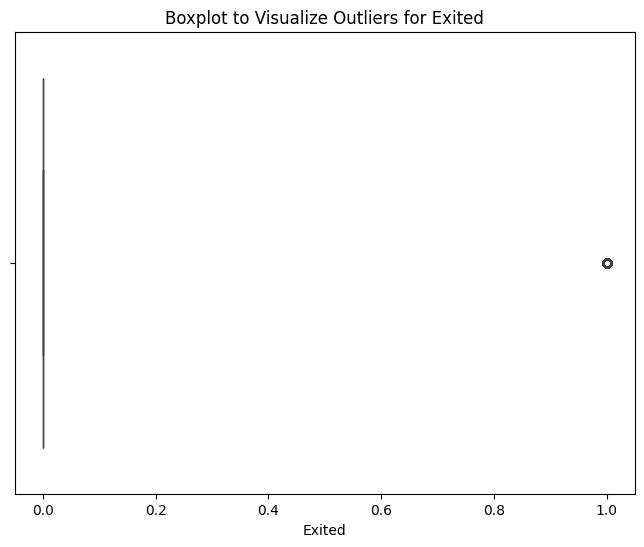

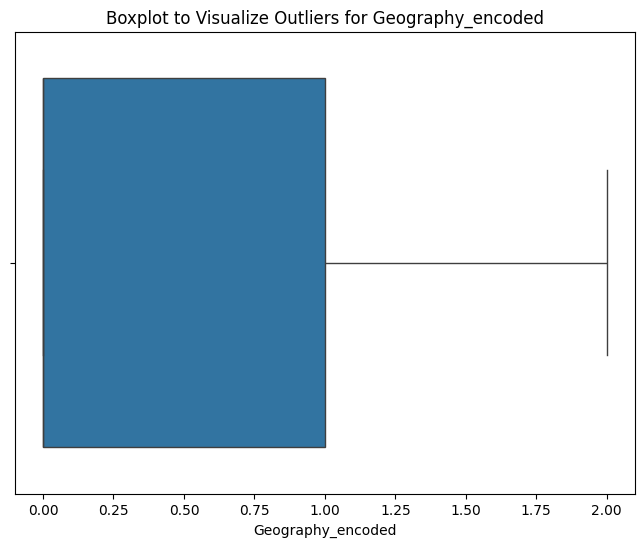

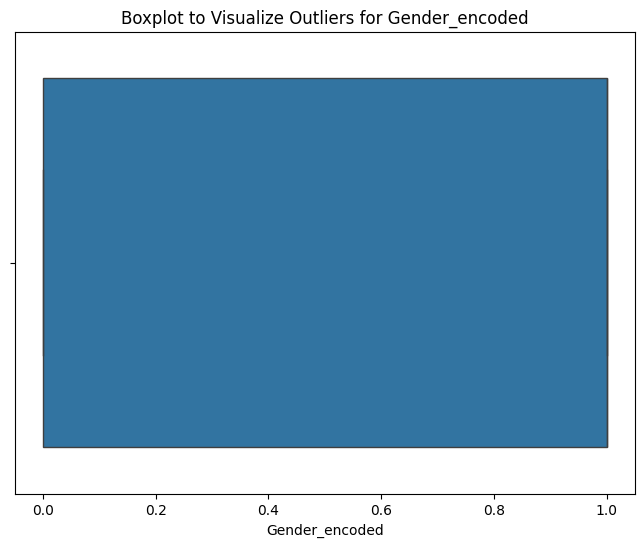

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numeric columns from the dataframe
numeric_cols = df1.select_dtypes(include=[np.number]).columns

# Plot boxplot for each numeric column separately
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot to Visualize Outliers for {col}')
    plt.show()


### Outlier Detection using Z-score:

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Sample DataFrame (replace this with your actual DataFrame)


# Calculate Z-scores for all columns
z_scores = df1.apply(zscore)

# Define threshold for outlier detection (e.g., 3)
threshold = 3

# Identify outliers for each column
outliers_z = (np.abs(z_scores) > threshold).astype(int)

# Add a new column in df to show outliers based on Z-score
df_outliers_z = df1.copy()
df_outliers_z['outlier_z'] = outliers_z.apply(lambda row: 'Outlier' if any(row) else 'Normal', axis=1)
df_outliers_z['outlier_z'].value_counts()

,count
outlier_z,
Normal,9920
Outlier,76


###  Outlier Detection using IQR:

In [28]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = ((df1 < lower_bound) | (df1 > upper_bound)).astype(int)

df_outliers_iqr = df1.copy()
df_outliers_iqr['outlier_iqr'] = outliers_iqr.apply(lambda row: 'Outlier' if any(row) else 'Normal', axis=1)

print("outlier \n",df_outliers_iqr['outlier_iqr'].value_counts(),"\n")
print("outlier % in target value\n",df_outliers_iqr[df_outliers_iqr['outlier_iqr']=="Outlier"]["Exited"].value_counts())

outlier 
 outlier_iqr
Normal     7791
Outlier    2205
Name: count, dtype: int64 

outlier % in target value
 Exited
1    2037
0     168
Name: count, dtype: int64


###  Multiple T-tests (for comparing two groups across multiple continuous columns)

In [29]:
from scipy import stats

# List of continuous columns you want to test (replace with your actual column names)
continuous_columns = df1.columns  # Replace with your actual column names

# Iterate through each column and perform the T-test
for col in continuous_columns:
    group_0 = df1[df1['Exited'] == 0][col]
    group_1 = df1[df1['Exited'] == 1][col]

    # Perform Independent T-test
    t_stat, p_value = stats.ttest_ind(group_0, group_1)

    print(f"T-test for {col}:")
    print("T-statistic:", t_stat)
    print("P-value:", p_value)

    # Interpret the p-value
    if p_value < 0.05:
        print(f"There is a significant difference between the two groups for {col}.")
    else:
        print(f"There is no significant difference between the two groups for {col}.")
    print("-" * 50)


T-test for CreditScore:
T-statistic: 2.6976589402007094
P-value: 0.006994614042863798
There is a significant difference between the two groups for CreditScore.
--------------------------------------------------
T-test for Age_log:
T-statistic: -30.788361752562114
P-value: 6.015013198353504e-199
There is a significant difference between the two groups for Age_log.
--------------------------------------------------
T-test for Tenure:
T-statistic: 1.4088826572301838
P-value: 0.1589009796291128
There is no significant difference between the two groups for Tenure.
--------------------------------------------------
T-test for Balance:
T-statistic: -11.944919573940318
P-value: 1.1510854830850745e-32
There is a significant difference between the two groups for Balance.
--------------------------------------------------
T-test for NumOfProducts_log:
T-statistic: 8.914262759217948
P-value: 5.76891886052436e-19
There is a significant difference between the two groups for NumOfProducts_log.
------

### Multiple Chi-square Tests (for testing the relationship between categorical columns)


In [30]:
from scipy.stats import chi2_contingency

# List of categorical columns you want to test (replace with your actual column names)
categorical_columns = df1.columns # Replace with your actual column names

# Iterate through each categorical column and perform the Chi-square test
for col in categorical_columns:
    # Create a contingency table for "Exited" and the categorical column
    contingency_table = pd.crosstab(df1['Exited'], df1[col])

    # Perform Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test for {col}:")
    print("Chi-square statistic:", chi2_stat)
    print("P-value:", p_value)
    print("Degrees of Freedom:", dof)
    # print("Expected frequencies table:\n", expected)

    # Interpret the p-value
    if p_value < 0.05:
        print(f"There is a significant association between Exited and {col}.")
    else:
        print(f"There is no significant association between Exited and {col}.")
    print("-" * 50)


Chi-square test for CreditScore:
Chi-square statistic: 509.7664536870528
P-value: 0.05057728448118012
Degrees of Freedom: 459
There is no significant association between Exited and CreditScore.
--------------------------------------------------
Chi-square test for Age_log:
Chi-square statistic: 1609.7995115484684
P-value: 1.388320767386292e-288
Degrees of Freedom: 72
There is a significant association between Exited and Age_log.
--------------------------------------------------
Chi-square test for Tenure:
Chi-square statistic: 13.769996166762065
P-value: 0.18374365731073253
Degrees of Freedom: 10
There is no significant association between Exited and Tenure.
--------------------------------------------------
Chi-square test for Balance:
Chi-square statistic: 7337.444795279211
P-value: 2.557787547885078e-16
Degrees of Freedom: 6378
There is a significant association between Exited and Balance.
--------------------------------------------------
Chi-square test for NumOfProducts_log:
Chi

### Multicollinearity check (VIF)

In [31]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = df1.drop(columns=['Exited'])  # Remove "Exited" if it's your target variable

# Add a constant for the intercept term (important for VIF calculation)
X_const = add_constant(X)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Display VIF results
print(vif_data)


             Variable         VIF
0               const  297.516839
1         CreditScore    1.001105
2             Age_log    1.008308
3              Tenure    1.001935
4             Balance    1.125972
5   NumOfProducts_log    1.122071
6           HasCrCard    1.001178
7      IsActiveMember    1.006943
8     EstimatedSalary    1.000888
9   Geography_encoded    1.006344
10     Gender_encoded    1.002131


# model building

### min max scaler

In [32]:
# import module
from sklearn.preprocessing import StandardScaler
y = df1["Exited"]
X = df1.drop(columns=["Exited"])

# create data

# compute required values
scaler = StandardScaler()
model_ss = scaler.fit(X)
scaled_data_x = model_ss.transform(X)

# print scaled data
print(scaled_data_x)

[[-0.32605418  0.42329446 -1.04187008 ...  0.02159919 -0.90203855
  -1.09580683]
 [-0.43990244  0.32978764 -1.38762664 ...  0.2162369   1.51500403
  -1.09580683]
 [-1.53698567  0.42329446  1.03266928 ...  0.24038886 -0.90203855
  -1.09580683]
 ...
 [ 0.60543158 -0.17390544  0.68691272 ... -1.00887984 -0.90203855
  -1.09580683]
 [ 1.25747161  0.42329446 -0.69611352 ... -0.1255108   0.30648274
   0.9125696 ]
 [ 1.46446844 -1.14202463 -0.35035696 ... -1.0766032  -0.90203855
  -1.09580683]]


In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, ytrain, ytest = train_test_split(scaled_data_x,y, test_size =0.2, stratify =y, random_state =42)

In [34]:
len(x_train), len(x_test), len(ytrain), len(ytest)

(7996, 2000, 7996, 2000)

In [35]:
ytrain.value_counts()/len(ytrain)*100

,count
Exited,
0,79.627314
1,20.372686


# algorithm

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

def train_models(x_train, x_test, y_train, y_test):
    models = {}

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf = RandomForestClassifier(class_weight='balanced')
    rf.fit(x_train, y_train)
    models['Random Forest'] = (rf, rf.predict(x_test), rf.predict_proba(x_test)[:, 1])
    # rs

    param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
    }
    rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, scoring='recall', cv=3)
    rs.fit(x_train, ytrain)
    models['Random search'] = (rs, rs.predict(x_test), rs.predict_proba(x_test)[:, 1])

    # XGBoost
    xgb_train = xgb.DMatrix(x_train, label=y_train, enable_categorical=True)
    xgb_test = xgb.DMatrix(x_test, label=y_test, enable_categorical=True)
    xgb_model = xgb.train(params={'objective': 'binary:logistic', 'max_depth': 3, 'learning_rate': 0.1},
                          dtrain=xgb_train, num_boost_round=50)
    xgb_preds = xgb_model.predict(xgb_test)
    models['XGBoost'] = (xgb_model, (xgb_preds > 0.5).astype(int), xgb_preds)

    # LightGBM
    lgb_model = lgb.LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)
    lgb_model.fit(x_train, y_train)
    models['LightGBM'] = (lgb_model, lgb_model.predict(x_test), lgb_model.predict_proba(x_test)[:, 1])

    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, random_state=16)
    lr = LogisticRegression(class_weight='balanced')

    lr.fit(x_train, y_train)
    models['Logistic Regression'] = (lr, lr.predict(x_test), lr.predict_proba(x_test)[:, 1])

    # K-Nearest Neighbors
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    models['K-Nearest Neighbors'] = (knn, knn.predict(x_test), knn.predict_proba(x_test)[:, 1])

    return models


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

def evaluate_metrics(models, y_test):
    plt.figure(figsize=(10, 6))

    for name, (model, y_pred, y_prob) in models.items():
        print(f"\n===== {name} =====")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))

        auc_score = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        print("ROC AUC Score:", auc_score)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


[LightGBM] [Info] Number of positive: 1629, number of negative: 6367
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 7996, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203727 -> initscore=-1.363162
[LightGBM] [Info] Start training from score -1.363162

===== Random Forest =====
Accuracy: 0.854
Precision: 0.7543859649122807
Recall: 0.4215686274509804
Confusion Matrix:
 [[1536   56]
 [ 236  172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1592
           1       0.75      0.42      0.54       408

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000

ROC AUC Score

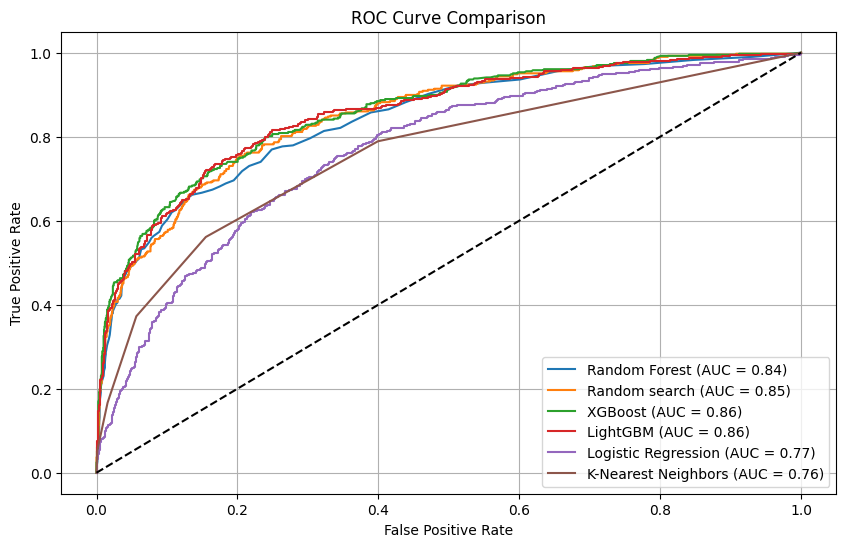

In [38]:
models = train_models(x_train, x_test, ytrain, ytest)
evaluate_metrics(models, ytest)



In [39]:
import pickle
import joblib

def save_models(models):
    for name, (model, _, _) in models.items():
        filename = f"{name.replace(' ', '_').lower()}_model"
        if name == "XGBoost":
            model.save_model(f"{filename}.json")
        else:
            joblib.dump(model, f"{filename}.pkl")

def load_model(name):
    filename = f"{name.replace(' ', '_').lower()}_model"
    if name == "XGBoost":
        model = xgb.Booster()
        model.load_model(f"{filename}.json")
        return model
    else:
        return joblib.load(f"{filename}.pkl")
save_models(models)


In [40]:


# Save the scaler to a file
joblib.dump(model_ss, "scaler.pkl")


['scaler.pkl']

In [41]:
# Load the scaler
scaler_loaded = joblib.load("scaler.pkl")

# Transform new data
X_scaled = scaler_loaded.transform(scaled_data_x)

# inference

In [42]:
input  = X.iloc[0]
input_conv = np.array([input])
X_scaled = scaler_loaded.transform(input_conv)

In [43]:
rfm= load_model("Random Forest")
rfm.predict(X_scaled), y[0]

(array([1]), np.int64(1))

In [44]:
#   Geography  Geography_encoded
# 0    France                  0
# 1     Spain                  2
# 7   Germany                  1
#    Gender  Gender_encoded
# 0  Female               0
# 5    Male               1